In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import random
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import pickle

### Supervised: Predicting Streams 

### Step 1: Data Exploration & Step 2: Data Cleaning

In [3]:
# Read the data
music = pd.read_csv("spotify_dataset.csv")

# Convert to dataframe
df = pd.DataFrame(music)

# Data Exploration: Check the first 5 rows
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [4]:
# Data Exploration: Check null data
df.isna().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

In [5]:
# Data Exploration: Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [6]:
# Data Exploration: Which genre is the most common ones? 
# Create a list to contain all genre
total_genre = []

# Data Exploration: Split each genre lists as independent element  
df["Genre"] = df["Genre"].str.split(",")

# Data Exploration: Loop through each genre
for i, genre_list in enumerate(df["Genre"]):
    for single_genre in genre_list:
        cleaned_genre = single_genre.strip("['] ")
        # Store cleaned genre in the list
        total_genre.append(cleaned_genre)

# Data Exploration: Observe the most common genre
count_genre = Counter(total_genre)
print(count_genre.most_common())

[('pop', 485), ('rap', 310), ('dance pop', 257), ('post-teen pop', 256), ('pop rap', 164), ('trap', 159), ('reggaeton', 157), ('trap latino', 155), ('latin', 154), ('hip hop', 151), ('melodic rap', 124), ('', 86), ('canadian pop', 85), ('electropop', 60), ('pop dance', 54), ('german hip hop', 53), ('atl hip hop', 53), ('uk pop', 52), ('edm', 50), ('chicago rap', 47), ('reggaeton colombiano', 45), ('k-pop', 45), ('tropical house', 45), ('brooklyn drill', 37), ('philly rap', 34), ('canadian hip hop', 32), ('rock', 32), ('k-pop boy group', 30), ('r&b', 30), ('toronto rap', 30), ('north carolina hip hop', 30), ('southern hip hop', 29), ('canadian contemporary r&b', 24), ('detroit hip hop', 24), ('modern rock', 23), ('puerto rican pop', 22), ('reggaeton flow', 21), ('alt z', 20), ('colombian pop', 18), ('viral pop', 18), ('k-pop girl group', 18), ('conscious hip hop', 18), ('ohio hip hop', 18), ('adult standards', 18), ('latin hip hop', 17), ('slap house', 17), ('pop rock', 17), ('lounge', 

In [7]:
# Data Cleaning: Convert streams to integer
df['Streams'] = (df['Streams'].replace(',','', regex = True)).astype(int)
print(df['Streams'])

# Data Cleaning: Convert release date into datetime
df["Release Date"] = df["Release Date"].str.strip()
df["Release Date"] = pd.to_datetime(df["Release Date"], format = "%Y-%m-%d")
df["Release Date"] = df["Release Date"].apply(lambda x: x.year)

# Data Cleaning: Convert other columns into numeric data
numeric_list = ["Artist Followers", "Popularity", "Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Liveness", "Tempo", "Duration (ms)", "Valence"]
for i in numeric_list: 
    df[i] = pd.to_numeric(df[i], errors = "coerce")

# Data Cleaning: Create dummies for chord column
chord_dummy = pd.get_dummies(df["Chord"], prefix = "Chord")
df = df.join(chord_dummy)


0       48633449
1       47248719
2       40162559
3       37799456
4       33948454
          ...   
1551     4630675
1552     4623030
1553     4620876
1554     4607385
1555     4595450
Name: Streams, Length: 1556, dtype: int64


In [8]:
# Data Cleaning: Initiate the dummy column as 0
df[["Rock", "Pop", "Hip Hop", "Rap", "Trap"]] = 0

# Data Cleaning: Loop through each genre
for i, genre_list in enumerate(df["Genre"]):
    for single_genre in genre_list:
        cleaned_genre = single_genre.strip("[']")
        # Update the value of dummy columns when matched
        if "rock" in cleaned_genre:
            df.loc[i, "Rock"] = 1 
        if "pop" in cleaned_genre:
            df.loc[i, "Pop"] = 1  
        if "hip hop" in cleaned_genre:
            df.loc[i, "Hip Hop"] = 1  
        if "trap" in cleaned_genre:
            df.loc[i, "Trap"] = 1 
        elif "rap" in cleaned_genre:
            df.loc[i, "Rap"] = 1 

In [9]:
# Data Cleaning: Drop columns that are not important or being replaced by dummies
cleaned_df = df.drop(["Week of Highest Charting", "Song ID", "Genre", "Weeks Charted", "Index", "Chord", "Song Name", "Artist"], axis = 1)

# Print the cleaned dataframe
cleaned_df 

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,...,Chord_E,Chord_F,Chord_F#/Gb,Chord_G,Chord_G#/Ab,Rock,Pop,Hip Hop,Rap,Trap
0,1,8,48633449,3377762.0,2017.0,100.0,0.714,0.800,-4.808,0.0504,...,0,0,0,0,0,1,1,0,0,0
1,2,3,47248719,2230022.0,2021.0,99.0,0.591,0.764,-5.484,0.0483,...,0,0,0,0,0,0,0,1,0,0
2,1,11,40162559,6266514.0,2021.0,99.0,0.563,0.664,-5.044,0.1540,...,0,0,0,0,0,0,1,0,0,0
3,3,5,37799456,83293380.0,2021.0,98.0,0.808,0.897,-3.712,0.0348,...,0,0,0,0,0,0,1,0,0,0
4,5,1,33948454,5473565.0,2021.0,96.0,0.736,0.704,-7.409,0.0615,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,4630675,27167675.0,2017.0,79.0,0.762,0.700,-6.021,0.0694,...,0,0,0,0,0,0,1,0,0,0
1552,196,1,4623030,15019109.0,2019.0,66.0,0.528,0.870,-3.123,0.0851,...,0,0,0,0,0,0,0,0,0,0
1553,197,1,4620876,22698747.0,2018.0,81.0,0.765,0.523,-4.333,0.0300,...,0,0,0,0,0,0,1,0,0,0
1554,198,1,4607385,208630.0,2019.0,60.0,0.832,0.550,-7.026,0.0587,...,0,1,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Streams frequencies')

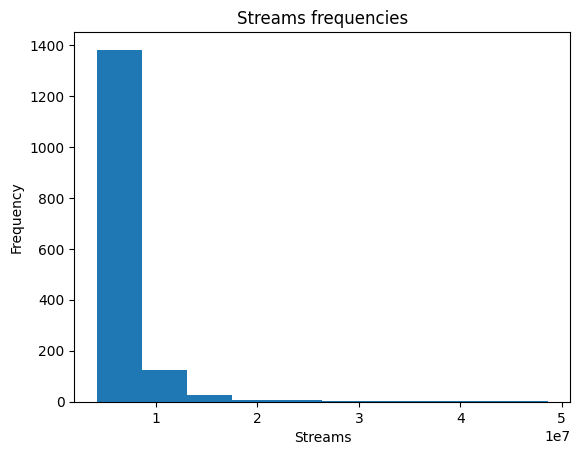

In [10]:
# Data Exploration: Data Visualization
plt.hist(df["Streams"])
plt.xlabel("Streams")
plt.ylabel("Frequency")
plt.title("Streams frequencies")

Text(0.5, 1.0, 'Number of Followers frequencies')

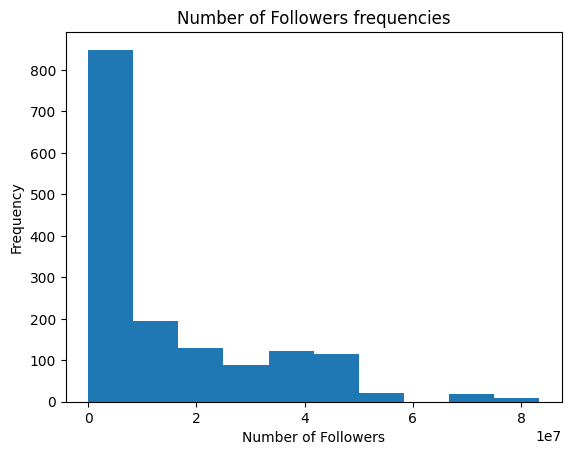

In [11]:
# Data Exploration: Data Visualization
plt.hist(df["Artist Followers"])
plt.xlabel("Number of Followers")
plt.ylabel("Frequency")
plt.title("Number of Followers frequencies")

Text(0.5, 1.0, 'Release Date frequencies')

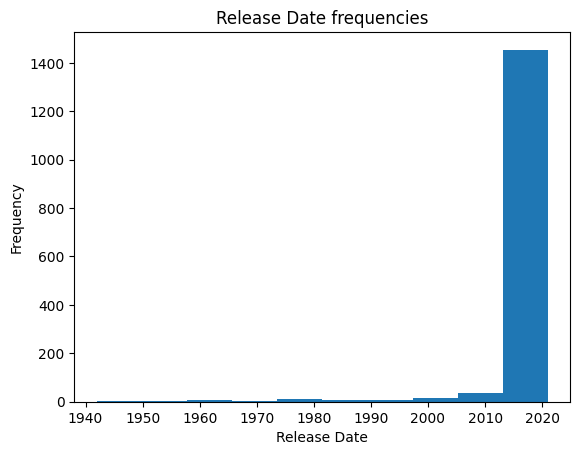

In [12]:
# Data Exploration: Data Visualization
plt.hist(df["Release Date"])
plt.xlabel("Release Date")
plt.ylabel("Frequency")
plt.title("Release Date frequencies")

Text(0.5, 1.0, 'Year of Release frequencies')

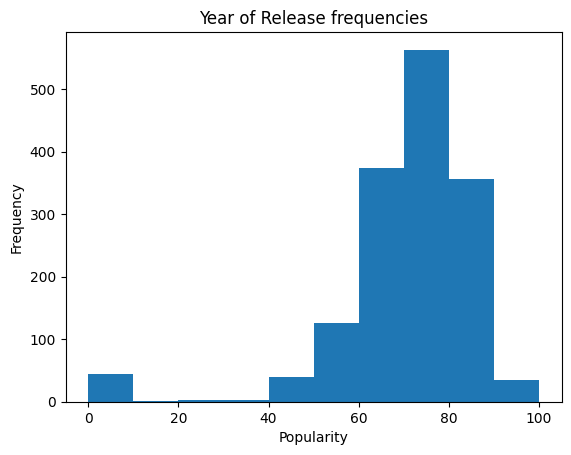

In [13]:
# Data Exploration: Data Visualization
plt.hist(df["Popularity"])
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.title("Year of Release frequencies")

Text(0.5, 1.0, 'Danceability frequencies')

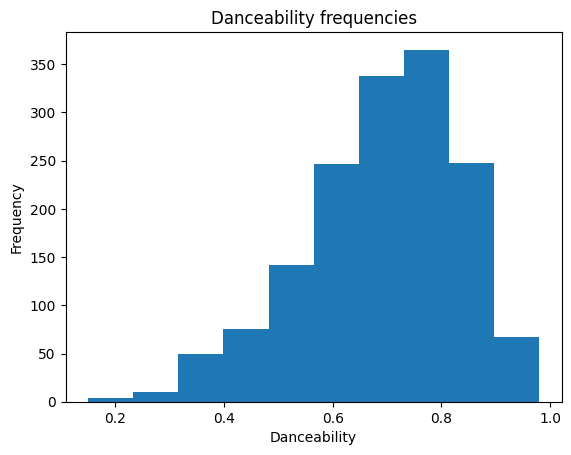

In [14]:
# Data Exploration: Data Visualization
plt.hist(df["Danceability"])
plt.xlabel("Danceability")
plt.ylabel("Frequency")
plt.title("Danceability frequencies")

Text(0.5, 1.0, 'Energy frequencies')

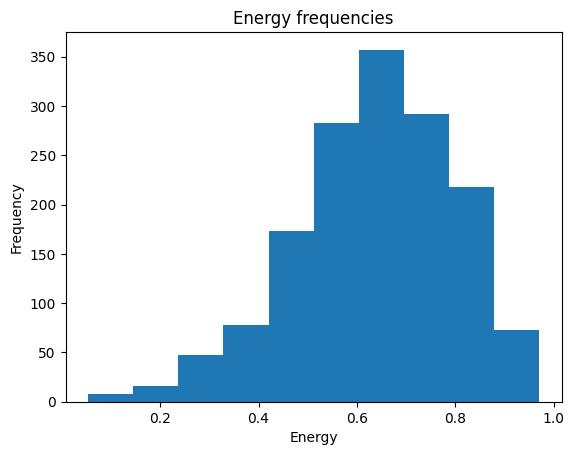

In [15]:
# Data Exploration: Data Visualization
plt.hist(df["Energy"])
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.title("Energy frequencies")

Text(0.5, 1.0, 'Loudness frequencies')

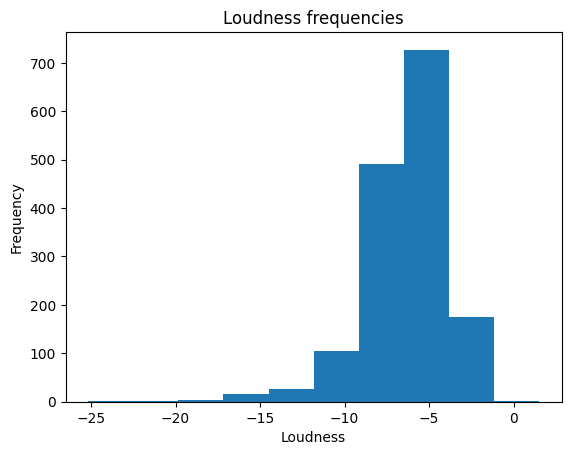

In [16]:
# Data Exploration: Data Visualization
plt.hist(df["Loudness"])
plt.xlabel("Loudness")
plt.ylabel("Frequency")
plt.title("Loudness frequencies")

Text(0.5, 1.0, 'Speechiness frequencies')

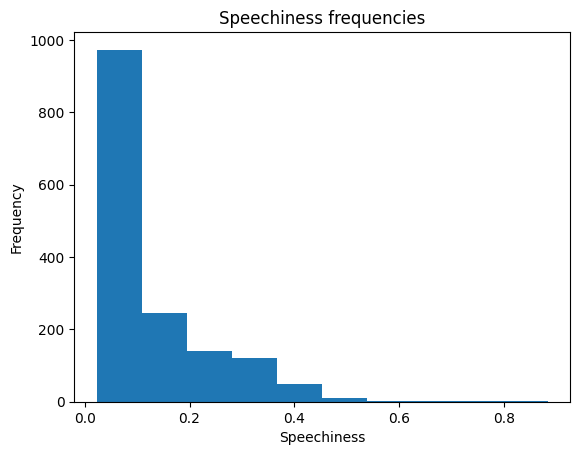

In [17]:
# Data Exploration: Data Visualization
plt.hist(df["Speechiness"])
plt.xlabel("Speechiness")
plt.ylabel("Frequency")
plt.title("Speechiness frequencies")

Text(0.5, 1.0, 'Acousticness frequencies')

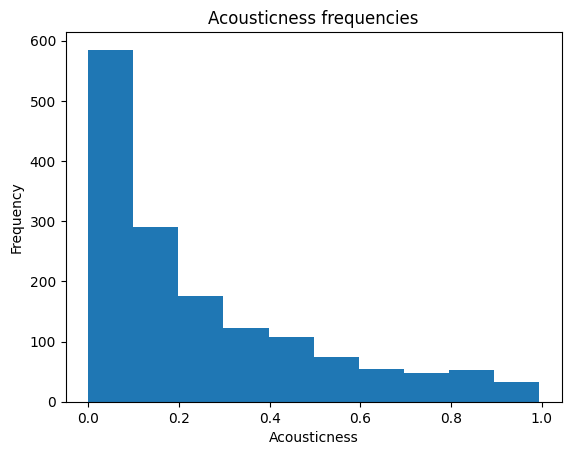

In [18]:
# Data Exploration: Data Visualization
plt.hist(df["Acousticness"])
plt.xlabel("Acousticness")
plt.ylabel("Frequency")
plt.title("Acousticness frequencies")

Text(0.5, 1.0, 'Liveness frequencies')

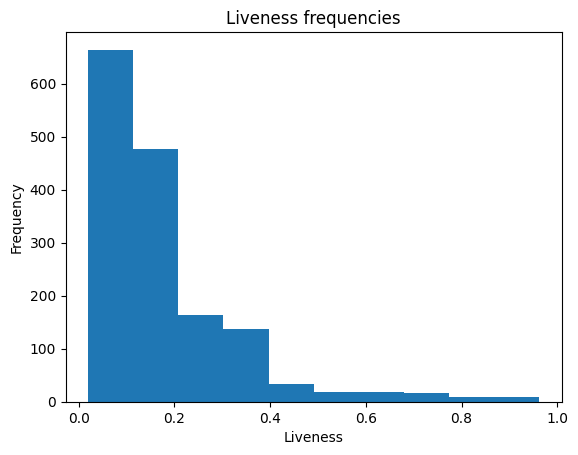

In [19]:
# Data Exploration: Data Visualization
plt.hist(df["Liveness"])
plt.xlabel("Liveness")
plt.ylabel("Frequency")
plt.title("Liveness frequencies")

Text(0.5, 1.0, 'Tempo frequencies')

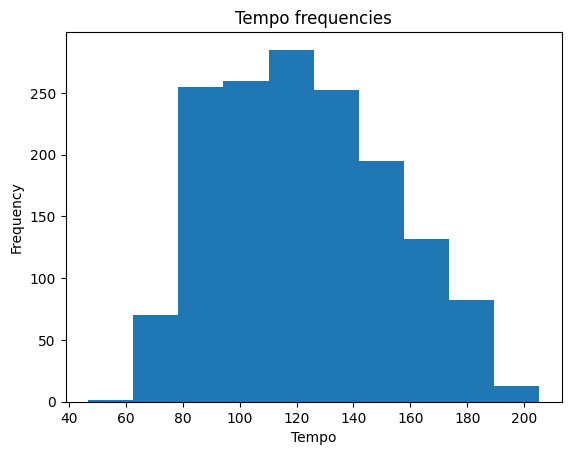

In [20]:
# Data Exploration: Data Visualization
plt.hist(df["Tempo"])
plt.xlabel("Tempo")
plt.ylabel("Frequency")
plt.title("Tempo frequencies")

Text(0.5, 1.0, 'Duration (ms) frequencies')

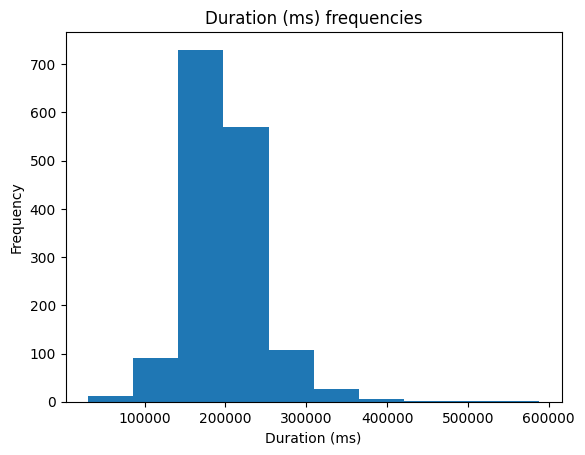

In [21]:
# Data Exploration: Data Visualization
plt.hist(df["Duration (ms)"])
plt.xlabel("Duration (ms)")
plt.ylabel("Frequency")
plt.title("Duration (ms) frequencies")

Text(0.5, 1.0, 'Valence frequencies')

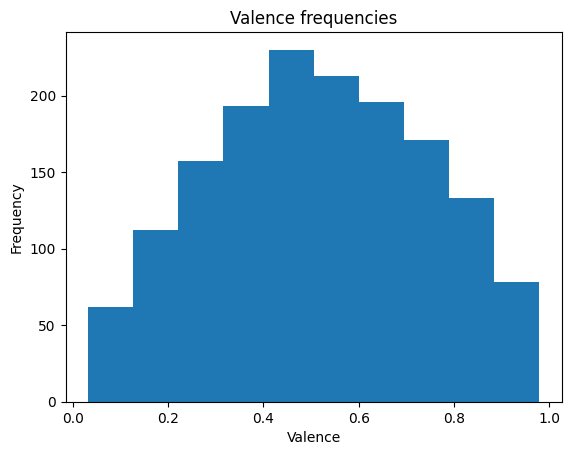

In [22]:
# Data Exploration: Data Visualization
plt.hist(df["Valence"])
plt.xlabel("Valence")
plt.ylabel("Frequency")
plt.title("Valence frequencies")

Text(0.5, 1.0, 'Chord frequencies')

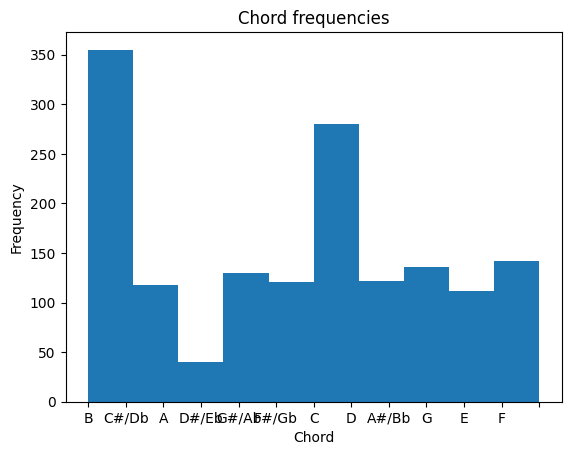

In [23]:
# Data Exploration: Data Visualization
plt.hist(df["Chord"])
plt.xlabel("Chord")
plt.ylabel("Frequency")
plt.title("Chord frequencies")

### Step 3: Data Preprocessing

In [24]:
# Data Preprocessing: Scale the data except dummies, song name and artist
final_df = cleaned_df.copy()
scaled_feature = ["Number of Times Charted", "Streams", "Artist Followers", "Release Date", "Popularity", "Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Liveness", "Tempo", "Duration (ms)", "Valence"]

# Use Standard Scaler to specific column
features = final_df[scaled_feature]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
final_df[scaled_feature] = features

# Drop NAs
final_df = final_df.dropna()
final_df.to_csv("Final_Spotify_DF.csv", index = False)

### Step 4: Feature Selection

In [25]:
# Split the data into training group and testing group
random.seed(123)
x = final_df[["Highest Charting Position", "Number of Times Charted", "Artist Followers", "Release Date", "Popularity", "Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Liveness", "Tempo", "Duration (ms)", "Valence", "Chord_ ", "Chord_A", "Chord_A#/Bb", "Chord_B", "Chord_C", "Chord_C#/Db", "Chord_D", "Chord_D#/Eb", "Chord_E", "Chord_F", "Chord_F#/Gb", "Chord_G", "Chord_G#/Ab", "Rock", "Pop", "Hip Hop", "Rap", "Trap"]]
y = final_df["Streams"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [26]:
# Feature Selection: Use CV to find the optimal alpha for LASSO
alphas = np.logspace(-4, 0, 100)

# Fit a Lasso regression model for each alpha value
model = LassoCV(alphas = alphas, cv = 5)
model.fit(x_train, y_train)

# Evaluate each model on the validation set using MSE and select the best MSE
mse_values = np.mean((model.predict(x_test) - y_test) ** 2, axis = 0)
best_alpha = model.alpha_
best_alpha

0.004534878508128582

In [27]:
# LASSO Regression
model = Lasso(alpha = best_alpha)
model.fit(x_train, y_train)

# Validate with test set and get MSE
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

# Choose those coefficents != 0
lasso_x_train = x_train.iloc[:,model.coef_!=0]
print(lasso_x_train)
lasso_col = lasso_x_train.columns.tolist()
#print(lasso_col)

      Highest Charting Position  Number of Times Charted  Artist Followers  \
1438                         95                -0.224293         -0.596703   
1014                         49                 0.753984         -0.513234   
1267                        132                -0.591147         -0.828770   
967                          18                -0.468862          1.650274   
1155                         59                -0.468862          1.287361   
...                         ...                      ...               ...   
1025                         69                 0.509414         -0.362634   
167                          13                -0.040866         -0.506910   
7                             2                -0.040866         -0.518063   
221                          22                 0.692841          0.745368   
1360                         47                -0.530005          1.345774   

      Release Date  Popularity  Danceability  Loudness  Speechi

### Step 5: Supervised Model Building: Prediction

    1. Linear Regression 
    2. Tree 
    3. Random Forest 
    4. XGBoost 

In [28]:
# Extract Lasso selcted column from x_test
lasso_x_test = x_test[lasso_col]

# Linear Regression
linear_model = LinearRegression().fit(lasso_x_train , y_train)

# Cross Validation
cv_scores = cross_val_score(linear_model, lasso_x_train, y_train, cv=10)

# Get mean CV score
cv_scores_mean = np.mean(cv_scores)
print(cv_scores , "\n\n""mean =" ,"{:.2f}".format(cv_scores_mean))

# Save model
linear_filename = 'finalized_linear_model.sav'
pickle.dump(linear_model, open(linear_filename, 'wb'))

# Load the pickled model
linear_from_pickle = pickle.load(open(linear_filename, 'rb'))

# Use the loaded pickled model to make predictions
y_pred_linear = linear_from_pickle.predict(lasso_x_test)


# Use MSE to evaluate
linear_mse = mean_squared_error(y_pred_linear, y_test)
print("Linear Regression MSE:", linear_mse)

# Evaluate accuracy score
linear_score = linear_from_pickle.score(lasso_x_test , y_test)
print("Linear Regression Accuracy Score:", linear_score)

[ 0.13667945  0.12776313  0.15981927  0.20659365 -0.22843471  0.18991142
  0.18456359  0.184471    0.16550655 -0.01700711] 

mean = 0.11
Linear Regression MSE: 1.2605227258818745
Linear Regression Accuracy Score: 0.1726305424633402


In [29]:
# Tree model
tree_model = DecisionTreeRegressor(random_state=44)
tree_model.fit(lasso_x_train, y_train)

# Cross Validation
cv_scores = cross_val_score(tree_model, lasso_x_train, y_train, cv=10)

# Get mean CV score
cv_scores_mean = np.mean(cv_scores)
print(cv_scores , "\n\n""mean =" ,"{:.2f}".format(cv_scores_mean))

# Save model
tree_filename = 'finalized_tree_model.sav'
pickle.dump(tree_model, open(tree_filename, 'wb'))

# Load the pickled model
tree_from_pickle = pickle.load(open(tree_filename, 'rb'))

# Use the loaded pickled model to make predictions
y_pred_tree = tree_from_pickle.predict(lasso_x_test)

# Use MSE to evaluate
tree_mse = mean_squared_error(y_pred_tree, y_test)
print("Tree MSE:", tree_mse)

# Evaluate accuracy score
tree_score = tree_from_pickle.score(lasso_x_test , y_test)
print("Tree Accuracy Score:", tree_score)

[0.45546788 0.77979444 0.88119179 0.68953766 0.77684444 0.55249481
 0.38577819 0.77787827 0.55913734 0.15890982] 

mean = 0.60
Tree MSE: 0.20418490915182896
Tree Accuracy Score: 0.8659791259186292


In [30]:
# Random Forest
rf = RandomForestRegressor(n_estimators = 1000, random_state = 40)

# Train the model on training data
rf.fit(lasso_x_train, y_train)

# Cross Validation
cv_scores = cross_val_score(rf, lasso_x_train, y_train, cv = 10)

# Get mean CV score
cv_scores_mean = np.mean(cv_scores)
print(cv_scores , "\n\n""mean =" ,"{:.2f}".format(cv_scores_mean))

# Save model
rf_filename = 'finalized_rf_model.sav'
pickle.dump(rf, open(rf_filename, 'wb'))

# Load the pickled model
rf_from_pickle = pickle.load(open(rf_filename, 'rb'))
  
# Use the loaded pickled model to make predictions
y_pred_rf = rf_from_pickle.predict(lasso_x_test)

# Use MSE to evaluate
rf_mse = mean_squared_error(y_pred_rf, y_test)
print("Random Forest MSE", rf_mse)

# Evaluate accuracy score
rf_accu = rf_from_pickle.score(lasso_x_test, y_test)
print("Random Forest Accuracy Score:", rf_accu)

[0.60196499 0.87196212 0.8399817  0.76749158 0.83995034 0.82335222
 0.57698999 0.84056802 0.85025039 0.75267875] 

mean = 0.78
Random Forest MSE 0.25013834162032944
Random Forest Accuracy Score: 0.8358166657640047


In [31]:
# XGBoost
xgbr = xgb.XGBRegressor(booster = "gbtree", 
                        subsample = 0.8, 
                        eval_metric = 'rmse', 
                        max_depth = 5, 
                        objective = 'reg:squarederror',
                        verbosity = 0) 
xgbr.fit(lasso_x_train, y_train, eval_set = [(lasso_x_train, y_train), (lasso_x_test, y_test)], verbose = 100)

# Cross Validation
cv_scores = cross_val_score(xgbr, lasso_x_train, y_train, cv = 10)

# Get mean CV score
cv_scores_mean = np.mean(cv_scores)
print(cv_scores , "\n\n""mean =" ,"{:.2f}".format(cv_scores_mean))

# Save model
xgb_filename = 'finalized_xgb_model.sav'
pickle.dump(xgbr, open(xgb_filename, 'wb'))

# Load the pickled model
xgb_from_pickle = pickle.load(open(xgb_filename, 'rb'))

# Use the loaded pickled model to make predictions
y_pred_xgb = xgb_from_pickle.predict(lasso_x_test)

# Use MSE to evaluate
xgb_mse = mean_squared_error(y_pred_xgb, y_test)
print("XGB MSE:", xgb_mse)

# Evaluate accuracy score
xgb_accu = xgb_from_pickle.score(lasso_x_test, y_test)
print("XGB Accuracy Score:", xgb_accu)

[0]	validation_0-rmse:0.81287	validation_1-rmse:1.08030
[99]	validation_0-rmse:0.04065	validation_1-rmse:0.45499
[0.5501844  0.87922681 0.83216211 0.70892695 0.81684173 0.78668322
 0.61752495 0.83543057 0.86291996 0.78790677] 

mean = 0.77
XGB MSE: 0.2070118147308504
XGB Accuracy Score: 0.8641236295539874
